In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mmp = pd.read_csv(r'D:\Datasets\monthly_milk_production.csv')

In [3]:
mmp.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [4]:
mmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [5]:
mmp.Date = pd.to_datetime(mmp.Date, infer_datetime_format = True)
mmp_new = mmp.set_index(['Date'])
mmp_new

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


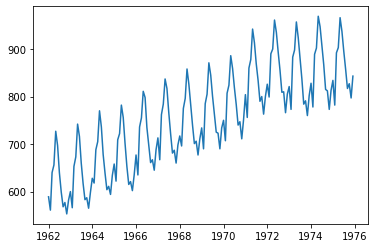

In [6]:
plt.plot(mmp_new)

In [7]:
mmp_new.diff()

,Production
Date,
1962-01-01,NaN
1962-02-01,-28.0
1962-03-01,79.0
1962-04-01,16.0
1962-05-01,71.0
...,...
1975-08-01,-38.0
1975-09-01,-41.0
1975-10-01,10.0


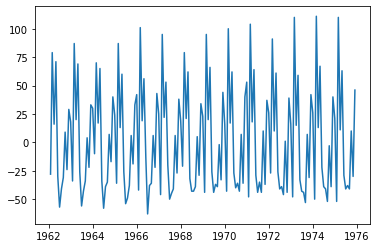

In [8]:
plt.plot(mmp_new.diff())

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


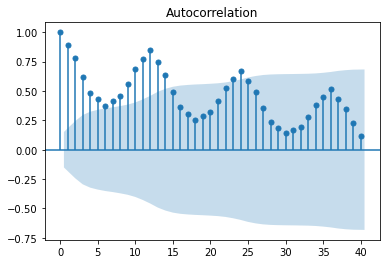

In [10]:
plot_acf(mmp_new.Production, lags=40 );

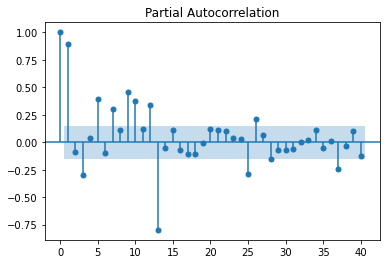

In [11]:
plot_pacf(mmp_new.Production, lags=40);

In [12]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(mmp_new, order=(3,1,0))
result = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [13]:
forecast = result.forecast(steps=12)
forecast

(array([837.29812981, 854.51064153, 848.86058632, 855.17635423,
        852.93429636, 856.54297333, 856.55317657, 859.09497158,
        860.01523118, 862.01343204, 863.29215743, 865.04063412]),
 array([ 43.32154623,  62.80116833,  84.79685967,  99.57214578,
        113.60450724, 124.93340615, 135.77407371, 145.4505885 ,
        154.73648908, 163.36963467, 171.65553975, 179.5080875 ]),
 array([[ 752.38945945,  922.20680018],
        [ 731.42261342,  977.59866964],
        [ 682.66179537, 1015.05937727],
        [ 660.01853463, 1050.33417383],
        [ 630.27355369, 1075.59503903],
        [ 611.6779968 , 1101.40794986],
        [ 590.44088206, 1122.66547109],
        [ 574.01705658, 1144.17288658],
        [ 556.73728548, 1163.29317688],
        [ 541.81483192, 1182.21203216],
        [ 526.85348177, 1199.73083308],
        [ 513.21124768, 1216.87002055]]))

In [14]:
forecast_n = forecast[0].round()
forecast_n

array([837., 855., 849., 855., 853., 857., 857., 859., 860., 862., 863.,
       865.])

In [15]:
mmp_new.shape

(168, 1)

In [16]:
train = mmp_new.iloc[0:156]
test  = mmp_new.iloc[156:168]

<AxesSubplot:xlabel='Date'>

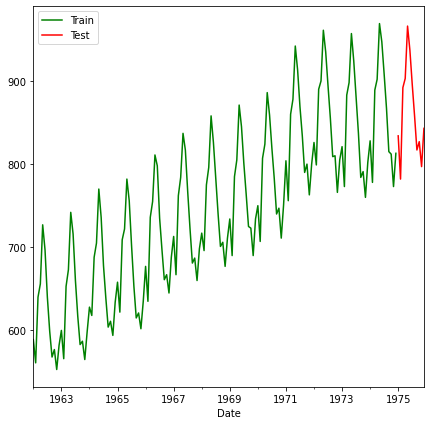

In [17]:
plt.figure(figsize= (7,7))
train['Production'].plot(legend=True, label='Train', color = 'green')
test['Production'].plot(legend=True, label='Test', color = 'red')

In [18]:
forecast_df = pd.DataFrame(forecast_n)
forecast_df

,0
0,837.0
1,855.0
2,849.0
3,855.0
4,853.0
5,857.0
6,857.0
7,859.0
8,860.0
9,862.0


In [19]:
forecast_df = pd.concat([pd.Series(test.index), forecast_df], axis=1)
N1 = ['Date', 'Production']
forecast_df.columns = N1
forecast_df

,Date,Production
0,1975-01-01,837.0
1,1975-02-01,855.0
2,1975-03-01,849.0
3,1975-04-01,855.0
4,1975-05-01,853.0
5,1975-06-01,857.0
6,1975-07-01,857.0
7,1975-08-01,859.0
8,1975-09-01,860.0
9,1975-10-01,862.0


In [20]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        12 non-null     datetime64[ns]
 1   Production  12 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 320.0 bytes


In [21]:
forecast_df = forecast_df.set_index(['Date'])
forecast_df

,Production
Date,
1975-01-01,837.0
1975-02-01,855.0
1975-03-01,849.0
1975-04-01,855.0
1975-05-01,853.0
1975-06-01,857.0
1975-07-01,857.0
1975-08-01,859.0
1975-09-01,860.0


<AxesSubplot:xlabel='Date'>

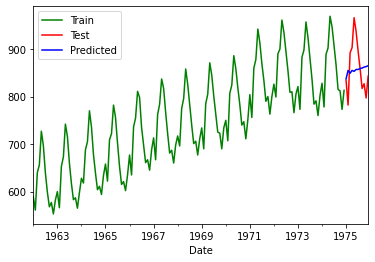

In [22]:
train['Production'].plot(legend=True, label ='Train', color='green')
test['Production'].plot(legend=True, label ='Test', color='red')
forecast_df['Production'].plot(legend=True, label ='Predicted', color='blue')

In [23]:
error = test['Production'] - forecast_df['Production']
error

Date
1975-01-01     -3.0
1975-02-01    -73.0
1975-03-01     43.0
1975-04-01     48.0
1975-05-01    113.0
1975-06-01     80.0
1975-07-01     39.0
1975-08-01     -1.0
1975-09-01    -43.0
1975-10-01    -35.0
1975-11-01    -66.0
1975-12-01    -22.0
Name: Production, dtype: float64

In [24]:
MSE = np.mean(np.square(error))
MSE

3174.6666666666665

In [25]:
MAPE = np.mean(np.abs(error*100/test['Production']))
MAPE

5.410161217003945